In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train = pd.read_csv('train.csv')

In [3]:
test = pd.read_csv('test.csv')

In [4]:
train.head()

,x,y
0,24.0,21.549452
1,50.0,47.464463
2,15.0,17.218656
3,38.0,36.586398
4,87.0,87.288984


In [5]:
test.head()

,x,y
0,77,79.775152
1,21,23.177279
2,22,25.609262
3,20,17.857388
4,36,41.849864


In [6]:
train.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


In [7]:
train[train['y'].isnull()]

,x,y
213,3530.157369,NaN


In [8]:
# drop the row which does not contain the y(i) value
train = train.drop(213)

In [9]:
train[train.isnull()].any()

x    False
y    False
dtype: bool

In [10]:
# now no values are missing and dataset is ready
train.describe()

,x,y
count,699.000000,699.000000
mean,50.014306,49.939869
std,28.954560,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,100.000000,108.871618


# Normalize the data

In [11]:
train_norm = (train-train.min()) / (train.max() - train.min())
test_norm = (test-test.min()) / (test.max() - test.min())

In [12]:
train_norm.head()

,x,y
0,0.24,0.225260
1,0.50,0.455183
2,0.15,0.186836
3,0.38,0.358671
4,0.87,0.808515


In [13]:
x_train = train_norm['x']
y_train = train_norm['y']

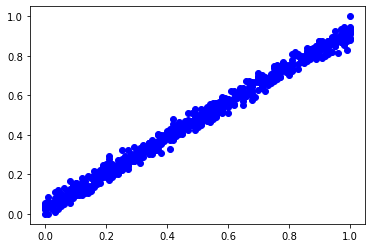

In [14]:
x_train = train_norm['x']
y_train = train_norm['y']
plt.scatter(x_train,y_train,c='blue')
plt.show()

# calculate mean squared function or cost function J(w,b)
 y=wx+b w=weight b=constant

In [15]:
#mean squared cost fuction
def cost(x,y,w,b):
    n=x.shape[0]
    yhat=0.0
    diff=0.0
    for i in range(n):
        if i!=213:
            yhat=w*x[i]+b#function is linear as y=mx+c
            diff=diff+(yhat-y[i])**2
    diff=diff/(2*n)
    return diff

# Calculate Gradient

In [16]:
def calc_gradient(x,y,w,b):
    m=x.shape[0]
    yhat=0.0
    dj_dw=0.0
    dj_db=0.0
    for i in range(m):
        if i!=213:
            yhat=np.dot(w,x[i])+b
            # dj_dw=dj_dw+(yhat)
            # dj_db=dj_db+(yhat)
            dj_dw=dj_dw+(yhat-y[i])*x[i]
            dj_db=dj_db+(yhat-y[i])
    #         if(i%100==0):
    #             print(f'Found :{dj_dw,dj_db}')
    dj_dw=dj_dw/m
    dj_db=dj_db/m
    return dj_dw,dj_db

# Calculate Gradient Descent

In [17]:
def gradient_descent(x,y,w,b,pd_hist,w_hist,alpha,iter):
    dw=0.0
    db=0.0
    w_prev=0.0
    for i in range(iter):
        dw,db=calc_gradient(x,y,w,b)
        w=w-alpha*dw
        if abs(w_prev-w)<0.00001:
            break
        w_prev=w
        pd_hist.append(cost(x,y,w,b))
        w_hist.append(w)
        b=b-alpha*db            
        if (i%10==0):
            print(f'Caculating the weight and constant:{w,b}')
        
    return w,b,pd_hist,w_hist

In [18]:
x_train=train_norm['x']
y_train=train_norm['y']
w=0.0
b=0.0
pd_hist=[]
w_hist=[]
iterations=8000
alpha=0.2
w_f,b_f,pd_hist,w_hist=gradient_descent(x_train,y_train,w,b,pd_hist,w_hist,alpha,iterations)
print(f'Found the weight and constant:{w_f,b_f}')

Caculating the weight and constant:(0.06234967890958899, 0.09517828506768494)
Caculating the weight and constant:(0.29445315775672926, 0.3299119961778574)
Caculating the weight and constant:(0.3751209579507111, 0.3061778306208815)
Caculating the weight and constant:(0.439147234025088, 0.2729907916786485)
Caculating the weight and constant:(0.49486867900198866, 0.24325234605709709)
Caculating the weight and constant:(0.5436550649259837, 0.2171685497302922)
Caculating the weight and constant:(0.586385443434306, 0.19432009772656078)
Caculating the weight and constant:(0.6238124266894177, 0.17430729932726943)
Caculating the weight and constant:(0.6565942815054135, 0.15677831702285197)
Caculating the weight and constant:(0.6853075254244753, 0.1414248856677537)
Caculating the weight and constant:(0.7104571206942663, 0.12797699429436257)
Caculating the weight and constant:(0.7324853577067196, 0.11619814317003138)
Caculating the weight and constant:(0.7517796334468024, 0.10588118492379796)
Cac

# Plot of loss vs weight

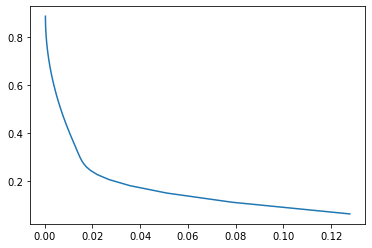

In [19]:
plt.plot(pd_hist,w_hist)
plt.show()

In [20]:
print(f'Found he weight and constant:{w_f,b_f}')


Found he weight and constant:(0.8871991085898704, 0.033475538622828115)


In [21]:
x_test=test_norm['x']
y_test=test_norm['y']

c_y_test=w_f*x_test+b_f

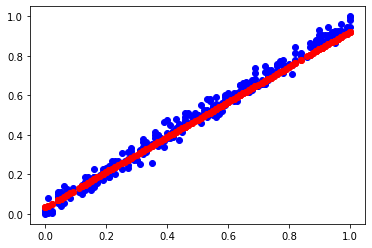

In [22]:
plt.scatter(x_test,y_test,c='blue')
plt.scatter(x_test,c_y_test,c='red')